# Ï∞®ÏõêÏ∂ïÏÜå Assignment2

## MNIST dataÏóê Ï†ÅÏö©ÏùÑ Ìï¥Î≥¥Í∏∞

mnist-original.mat ÌååÏùºÍ≥º Í∞ôÏùÄ ÏúÑÏπòÏóêÏÑú Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏùÑ Ïó¥Ïñ¥Ï£ºÏÑ∏Ïöî

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('/content/drive/MyDrive/ToBigs/Dimension/mnist-original.mat') #mnist ÏÜêÍ∏ÄÏî® Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§
X = mnist['data'].T
y = mnist['label'].T

# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥!
- 7ÎßåÍ∞úÏùò ÏûëÏùÄ Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ
- Ìñâ Ïó¥Ïù¥ Î∞òÎåÄÎ°ú ÎêòÏñ¥ÏûàÏùå -> Ï†ÑÏπò
- grayscale 28x28 pixel = 784 feature
- Í∞Å picelÏùÄ 0~255Ïùò Í∞í
- label = 1~10 labelÏù¥ Ï¥ù 10Í∞úÏù∏Í±∞Ïóê Ï£ºÎ™©ÌïòÏûê

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# dataÎ•º Í∞Å ÌîΩÏÖÄÏóê Ïù¥Î¶ÑÎ∂ôÏó¨ ÌëúÌòÑ
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [6]:
# dfÏóê ÎùºÎ≤® yÎ•º Î∂ôÏó¨ÏÑú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
69995       0  ...         0         0         0         0         0   
69996       0  ...         0         0         0         0         0   
69997       0  ...         0         0         0         0         0   
69998       0  ...         0         0         0         0         0   
69999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783    y  
0             0         0         0         0  0.0  
1             0         0         0         0  0.0  
2             0         0         0         0  0.0  
3             0         0         0         0  0.0  
4             0         0         0         0  0.0  
...         ...       ...       ...       ...  ...  
69995         0         0         0         0  9.0  
69996         0         0         0         0  9.0  
69997         0         0         0         0  9.0  
69998         0         0         0         0  9.0  
69999         0         0         0         0  9.0  

[70000 rows x 785 columns]

<Figure size 432x288 with 0 Axes>

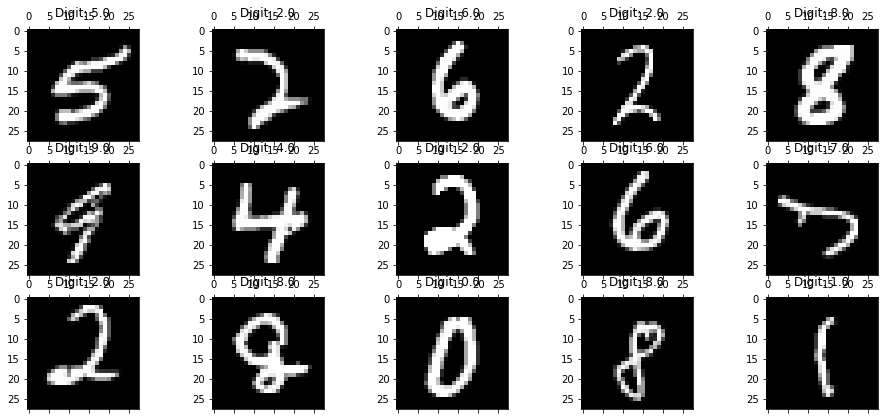

In [8]:
# Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÏãúÍ∞ÅÌôî

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_splitÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º 0.8 0.2Ïùò ÎπÑÏú®Î°ú Î∂ÑÌï† Ìï¥ Ï£ºÏÑ∏Ïöî

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞Îäî ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞ & PCA Ï∂ïÏÜå Îç∞Ïù¥ÌÑ∞ & LDA Ï∂ïÏÜå Îç∞Ïù¥ÌÑ∞ ÎπÑÍµêÌï¥Ï£ºÏÑ∏Ïöî

### 2) Ï∞®ÏõêÏ∂ïÏÜå Í∏∞Î≤ï(PCAÏôÄ LDA)ÏùÑ Ïù¥Ïö©ÌïòÏó¨ mnist dataÎ•º Ï∂ïÏÜåÏãúÏºúÏ£ºÏÑ∏Ïöî

pcaÎ•º Ïù¥Ïö©Ìï† ÎïåÎäî, Ï£ºÏÑ±Î∂Ñ Í∞úÏàòÎ•º Ï†ïÌïòÎäî Í≥ºÏ†ïÏóê ÎåÄÌï¥ Ïûò ÏÑúÏà†Ìï¥Ï£ºÏãúÎ©¥ Ï¢ãÍ≤†Ï£†!<br>
Í∞ïÏùòÏóêÏÑú Î∞∞Ïõ†Îçò 3Í∞ÄÏßÄ Ï§ë Ïñ¥Îñ§ Í±∏ Í≥†Î†§Ìï¥ÏÑú Í∞ØÏàòÎ•º Ï†ïÌñàÎäîÏßÄÏöî!!!!<br>
scree plotÍ∞ôÏùÄÍ±∞Îäî ÏßÅÏ†ë Í∑∏Î†§ÏÑú ÌôïÏù∏Ìï¥Ï£ºÎ©¥ Ï¢ãÍ≤†Ï£†???

**PCA**

(1) ScalingÌïòÍ∏∞

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

X_train_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_test_std = scaler.transform(X_test) 

X_test_std

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(2) PCA ÏßÑÌñâÌïòÍ∏∞

In [12]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit_transform(X_train)

array([[-5.93022667e+02, -2.73346725e+02, -2.56451601e+01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.44688843e+02, -5.85332327e+02, -7.22878291e+02, ...,
         8.60454001e-14,  3.24902345e-14,  1.02675651e-13],
       [-2.46762877e+02,  3.59312766e+02, -4.62123110e+02, ...,
         1.15121793e-13, -2.47905836e-13,  7.01028700e-14],
       ...,
       [ 4.79002167e+02, -4.69799762e+02, -8.91260823e+02, ...,
        -2.52410490e-15, -4.69471902e-16,  7.60572872e-16],
       [-8.22161674e+01,  2.37391301e+01,  6.35541651e+02, ...,
         4.06924049e-15,  1.23408085e-15,  6.52585288e-16],
       [ 4.45484046e+01,  5.39102241e+02,  5.26818671e+02, ...,
         4.01319572e-16, -3.61595301e-16,  3.46462396e-16]])

(3) Ï£ºÏÑ±Î∂Ñ Í∞úÏàò Íµ¨ÌïòÍ∏∞
- *Scree Plot*
- *Rule of Thumb*

In [13]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# Scree Plot (1)
exp_var_ratio = pca.explained_variance_ratio_
print('explained variance ratio :', exp_var_ratio) # explained variance ratio Íµ¨ÌïòÍ∏∞

explained variance ratio : [9.75637507e-02 7.17515366e-02 6.12193326e-02 5.40279405e-02
 4.89542742e-02 4.31212995e-02 3.28663912e-02 2.88972312e-02
 2.75973978e-02 2.34787626e-02 2.10485765e-02 2.03277775e-02
 1.71204594e-02 1.69456800e-02 1.58816714e-02 1.48362869e-02
 1.32556414e-02 1.27748474e-02 1.18628713e-02 1.15099048e-02
 1.06100396e-02 1.01119764e-02 9.62252221e-03 9.06616667e-03
 8.80853834e-03 8.39409657e-03 8.11260444e-03 7.84610373e-03
 7.37473992e-03 6.87135702e-03 6.55405545e-03 6.45596845e-03
 6.03402872e-03 5.85577544e-03 5.67417019e-03 5.42829155e-03
 5.04296983e-03 4.85702356e-03 4.80316055e-03 4.68466454e-03
 4.53917548e-03 4.45380247e-03 4.16983857e-03 3.97331806e-03
 3.82140678e-03 3.72425457e-03 3.60354911e-03 3.46716424e-03
 3.39195385e-03 3.17708597e-03 3.16110546e-03 3.09194941e-03
 2.95028191e-03 2.86028328e-03 2.82921381e-03 2.69298043e-03
 2.69166500e-03 2.56988623e-03 2.52132058e-03 2.45437559e-03
 2.39914944e-03 2.38018472e-03 2.29795292e-03 2.20844230e-

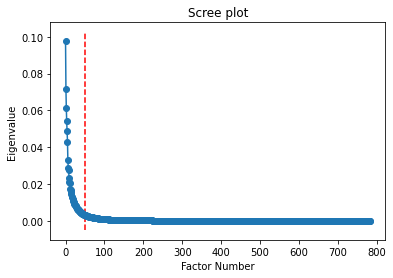

In [15]:
# Scree Plot (2)
plt.plot(range(len(exp_var_ratio)), exp_var_ratio, marker = 'o')
plt.title("Scree plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")

from kneed import KneeLocator
kn = KneeLocator(range(len(exp_var_ratio)), exp_var_ratio, curve = 'convex', direction = 'decreasing')     
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles = 'dashed', colors = 'r')    

plt.show()

In [16]:
print("Elbow Point :", kn.knee)

Elbow Point : 49


**Rule of Thumb**

: Ï¥ù Î∂ÑÏÇ∞ ÏÑ§Î™ÖÌïòÎäî ÎπÑÏ§ëÏù¥ 70%~90% ÏÇ¨Ïù¥ÏóêÏÑú ÏÑ†ÌÉùÌïòÎäî Î∞©Î≤ï
- ÌèâÍ∑†Í≥†Ïú†Í∞í (œÉi ùúÜùëñ ) / ùëù Î≥¥Îã§ ÏûëÏùÄ Í≥†Ïú†Í∞íÏùÑ Í∞ñÎäî Ï£ºÏÑ±Î∂Ñ Ï†úÍ±∞

In [17]:
# rule of thumb
for value in [0.7, 0.8, 0.9]:
    pca = PCA(n_components = value, svd_solver = 'full')
    X_pca = pca.fit_transform(X_train)
    exp_var_ratio = pca.explained_variance_
    print(len(exp_var_ratio))

26
43
87


**Output**

[Ï£ºÏÑ±Î∂ÑÏùò Í∞úÏàò ÏÑ†Ï†ï]
- Scree Plot = 49Í∞ú
- Rule of Thumb = 26Í∞ú (70%), 43Í∞ú (80%), 87Í∞ú (90%)

Îî∞ÎùºÏÑú, PCAÏùò Ï£ºÏÑ±Î∂Ñ Í∞úÏàòÎäî **49Í∞ú**Î°ú ÏÑ§Ï†ïÌïòÏòÄÎã§.

**LDA**

(1) LDA ÏßÑÌñâÌïòÍ∏∞

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

X_lda

array([[-0.06912157,  1.13957008,  0.38794875, ..., -0.14368827,
         1.11553249, -0.59958101],
       [-0.67173413,  1.42075406, -2.19965501, ...,  3.47665626,
        -1.42106679,  1.23848873],
       [ 1.83352224, -0.94239731,  1.44931672, ...,  2.94741639,
        -0.01629124, -0.01672142],
       ...,
       [-0.03694951,  0.32853802, -1.89390555, ...,  3.27434752,
        -2.16376956,  0.08726653],
       [-0.3749295 ,  0.31745898,  0.13492208, ..., -4.4336454 ,
         0.20476323,  0.02792065],
       [ 2.35304938, -1.81565835, -0.27061984, ...,  0.23786285,
        -0.87308289, -1.60394468]])

(2) Ï£ºÏÑ±Î∂Ñ Í∞úÏàò Íµ¨ÌïòÍ∏∞

- ÎàÑÏ†ÅÏÑ§Î™ÖÎ•†



In [19]:
# ÎàÑÏ†ÅÏÑ§Î™ÖÎ•† (1)
exp_var_ratio = lda.explained_variance_ratio_
exp_var_ratio

array([0.23755701, 0.20426112, 0.17582578, 0.10700601, 0.09465149,
       0.06888294, 0.049974  , 0.03481279, 0.02702885])

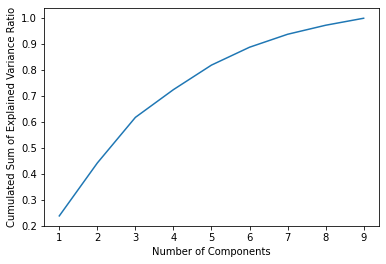

[0.23755701 0.44181813 0.61764392 0.72464993 0.81930142 0.88818436
 0.93815836 0.97297115 1.        ]


In [20]:
# ÎàÑÏ†ÅÏÑ§Î™ÖÎ•† (2)
exp_var_ratio_cumsum = np.cumsum(exp_var_ratio)

plt.plot(list(range(1, 1+len(exp_var_ratio_cumsum))), exp_var_ratio_cumsum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()

print(exp_var_ratio_cumsum)

**Output**

[Ï£ºÏÑ±Î∂ÑÏùò Í∞úÏàò ÏÑ†Ï†ï]
- ÎàÑÏ†ÅÏÇ¨Ïö©Î•† = 5Í∞ú

Îî∞ÎùºÏÑú, LDAÏùò Ï£ºÏÑ±Î∂Ñ Í∞úÏàòÎäî **5Í∞ú**Î°ú ÏÑ§Ï†ïÌïòÏòÄÎã§.

### 3) ÏßÄÍ∏àÍπåÏßÄ Î∞∞Ïõ†Îçò Î®∏Ïã†Îü¨Îãù Í∏∞Î≤ïÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌïôÏäµÌï¥Ï£ºÏÑ∏Ïöî (2Í∞úÏù¥ÏÉÅ ÏÇ¨Ïö©)

###  Ïù¥Îïå time stampÎ•º Ï∞çÏñ¥ÏÑú training ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÍ≥†, test accuracyÎèÑ ÎπÑÍµêÌï¥Ï£ºÏÑ∏Ïöî
#### (ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ & PCA Ï∂ïÏÜå Îç∞Ïù¥ÌÑ∞ & LDA Ï∂ïÏÜå Îç∞Ïù¥ÌÑ∞ ÎπÑÍµê)

ÌäπÏ†ïÌïú ÌãÄ ÏóÜÏù¥ ÏûêÏú†Î°≠Í≤å Ìï¥Ï£ºÏãúÎ©¥ Îê©ÎãàÎã§!

**PCA**

- Ï£ºÏÑ±Î∂Ñ Í∞úÏàò ÏßÄÏ†ï (49Í∞ú)

In [21]:
pca = PCA(n_components=49)

pca.fit(X_train_std)

PCA(n_components=49)

In [22]:
PCA(copy=True, iterated_power='auto', n_components=49, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=49)

(1) RandomForestClassifier

In [26]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [27]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

clf = RandomForestClassifier()

start = time.time()
clf.fit(X_train_pca, np.ravel(y_train))
end = time.time()
elapse_time = end - start

In [28]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, clf.predict(X_test_pca)))

Training time : 50.526631593704224
Test accuracy :  0.9469285714285715


(2) SVM

In [29]:
from sklearn import svm

svc = svm.SVC(kernel = 'rbf')

start = time.time()
svc.fit(X_train_pca, y_train)
end = time.time()
elapse_time = end - start

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, svc.predict(X_test_pca)))

Training time : 36.9807243347168
Test accuracy :  0.9690714285714286


**LDA**

- Ï£ºÏÑ±Î∂Ñ Í∞úÏàò ÏßÄÏ†ï

In [31]:
lda = LinearDiscriminantAnalysis(n_components = 5)

X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test) 

(1) RandomForestClassifier

In [32]:
clf = RandomForestClassifier()

start = time.time()
clf.fit(X_train_lda, np.ravel(y_train))
end = time.time()
elapse_time = end - start

In [33]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, clf.predict(X_test_lda)))

Training time : 15.303900957107544
Test accuracy :  0.8422857142857143


(2) SVM

In [34]:
svc = svm.SVC(kernel = 'rbf')

start = time.time()
svc.fit(X_train_lda, y_train)
end = time.time()
elapse_time = end - start

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print('Training time :', elapse_time)
print('Test accuracy : ', accuracy_score(y_test, svc.predict(X_test_lda)))

Training time : 24.227909088134766
Test accuracy :  0.8432857142857143
